In [1]:
import sys

sys.path.insert(0, "..")

In [2]:

import os
from pathlib import Path
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid

from src.acdc_dataset import ACDCDataset
from monai.utils import first, set_determinism
from torch.utils.data import DataLoader

set_determinism(seed=0)

root_dir = Path(os.getcwd()).parent
data_dir = root_dir / "data" / "ACDC" / "database" / "training"

acdc = ACDCDataset(data_dir=root_dir / "data" / "ACDC" / "database", train=True, transform=None)



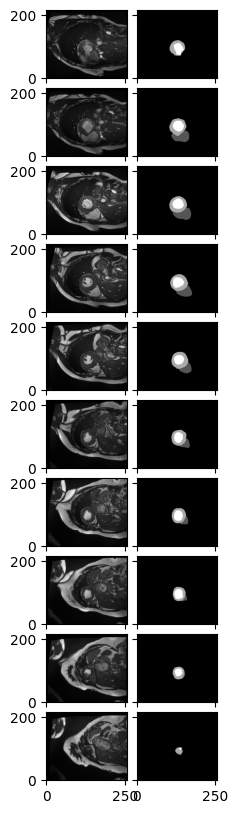

In [3]:
check_dataloader = DataLoader(acdc, batch_size=1, shuffle=True)
check_data = first(check_dataloader)
image, label = check_data["end_diastole"][0], check_data["end_diastole_label"][0]

slices = image.shape[2]
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(slices, 2), axes_pad=0.1)

images = []
for i in range(slices):
    images.append(image[:, :, i])
    images.append(label[:, :, i])

for ax, image in zip(grid, images):
    ax.imshow(image, cmap="gray", origin="lower")

plt.show()